## 1. Importación de librerías

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import fetch_california_housing
from keras import Sequential
from keras.layers import Input, Dropout, ReLU, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Carga de datos

In [2]:
# importamos datos
data = fetch_california_housing(as_frame=True)
df = data.frame

In [3]:
df.shape

(20640, 9)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Transformamos nuestro df en array
array_data = df.values 

# Separamos datos en X e y
X = array_data[:, :-1]  # todas las columnas menos la última
y = array_data[:, -1]   # la última columna es la target

In [6]:
# Normalizamos los datos para mejorar el rendimiento de la red
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Spliteamos train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 4. Arquitectura del modelo


In [8]:
# Arquitectura
model = Sequential(layers=[
    Input(shape = (X_train.shape[1],)),
    Dense(64),
    ReLU(),
    Dropout(0.3),

    Dense(32),
    ReLU(),
    Dropout(0.2),

    Dense(1)    # Salida para la regresión
])

In [9]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

## 5. Entrenamiento

In [10]:
# Entrenamos
history = model.fit(X_train, y_train, 
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6957 - mae: 0.9531 - val_loss: 0.5661 - val_mae: 0.5220
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7242 - mae: 0.6078 - val_loss: 0.4839 - val_mae: 0.4912
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5880 - mae: 0.5470 - val_loss: 0.4389 - val_mae: 0.4622
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5445 - mae: 0.5251 - val_loss: 0.4266 - val_mae: 0.4544
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5178 - mae: 0.5075 - val_loss: 0.4240 - val_mae: 0.4589
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4930 - mae: 0.4989 - val_loss: 0.4174 - val_mae: 0.4530
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4591 - mae: 0.4838 - val_loss: 0.4080 - val_mae: 0.4418
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4307 - mae: 0.4670 - val_loss: 0.3986 - val_mae: 0.4391
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

## 6. Evaluación

In [11]:
# Predecimos
y_pred = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


In [12]:
y_pred = model.predict(X_test).flatten()

for real, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Real: {real:.2f} - Predicción: {pred:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
Real: 0.48 - Predicción: 0.85
Real: 0.46 - Predicción: 1.50
Real: 5.00 - Predicción: 4.04
Real: 2.19 - Predicción: 2.57
Real: 2.78 - Predicción: 2.82


In [13]:
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Pérdida (loss): {loss}")
print(f"Error absoluto medio (MAE): {mae}")

129/129 - 0s - 1ms/step - loss: 0.3346 - mae: 0.3943
Pérdida (loss): 0.33461371064186096
Error absoluto medio (MAE): 0.3942635655403137


## 7. Visualización de métricas


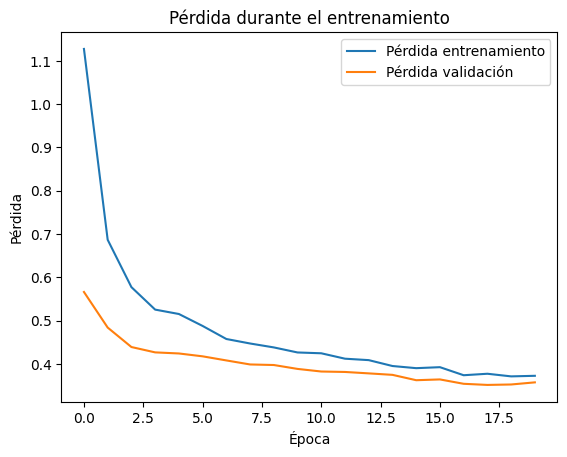

In [14]:
# Pérdida en entrenamiento
plt.plot(history.history['loss'], label='Pérdida entrenamiento')

# Pérdida en validación 
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Pérdida validación')

plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

In [15]:
mae

0.3942635655403137

## 8. Conclusiones

### Conclusiones

- El modelo logró un error MAE de 0.39.
- La red no muestra signos fuertes de overfitting.
- Podría mejorarse probando otras arquitecturas, ajustando hiperparámetros o agregando regularización.